Insurance premiums are often based on various factors that in the end decide the amount that will be covered from the insurance
company. As a data analyst/scientist you are given a set of historical data for an organizations customers and the respective
charges that were levied upon the insurance company.

The data gives you the information about the users including their age, sex, bmi, hospitalization history, annual income, etc.
Analyze and gather insights fron the data and create a linear regression model that will best predict the insurance charges
for a new set of data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
insurance=pd.read_csv('new_insurance_data (1) (1).csv')

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [6]:
insurance.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [7]:
insurance.shape

(1338, 13)

In [8]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [9]:
insurance.duplicated().sum()

0

In [10]:
insurance['children'].value_counts()

0.0    574
1.0    321
2.0    240
3.0    156
4.0     25
5.0     17
Name: children, dtype: int64

In [11]:
insurance['NUmber_of_past_hospitalizations'].value_counts()

1.0    957
2.0    227
0.0    150
3.0      2
Name: NUmber_of_past_hospitalizations, dtype: int64

In [12]:
insurance.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


# DISTRIBUTIONS

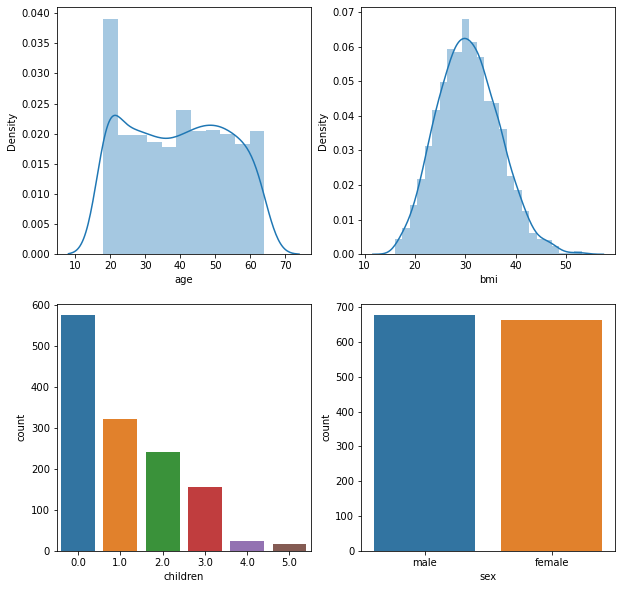

In [18]:
plt.subplots(2,2,figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(insurance['age'])
plt.subplot(2,2,2)
sns.distplot(insurance['bmi'])
plt.subplot(2,2,3)
sns.countplot(insurance['children'])
plt.subplot(2,2,4)
sns.countplot(insurance['sex']);

In [19]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [20]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

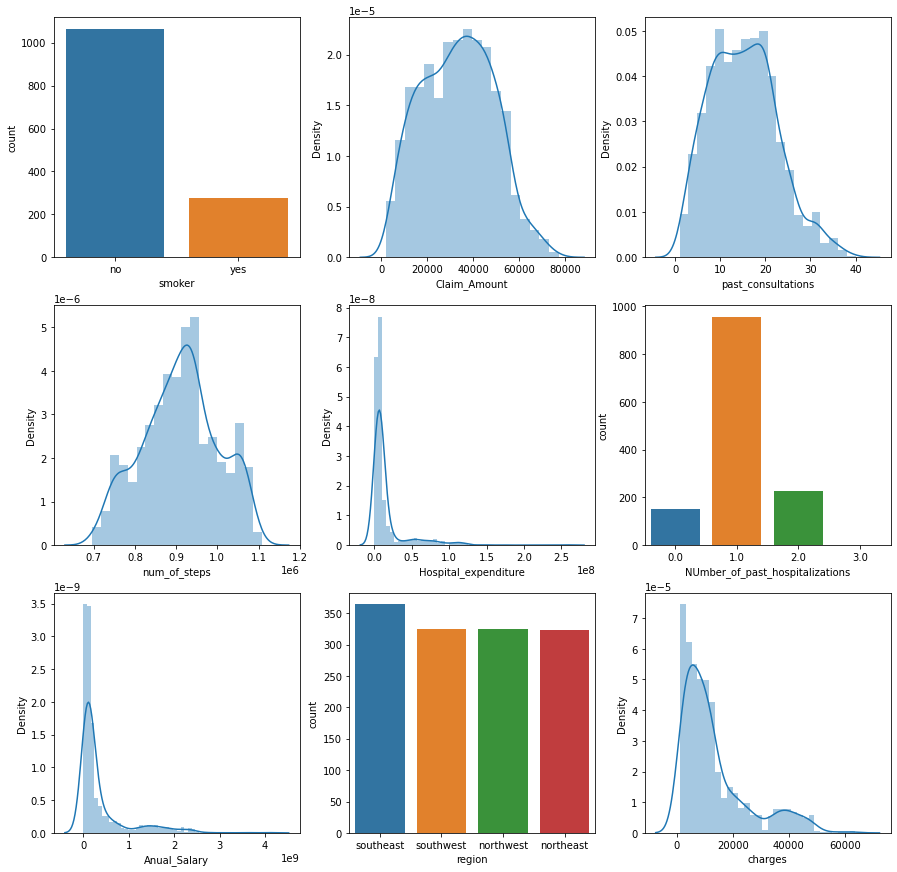

In [27]:
plt.subplots(3,3,figsize=(15,15))

plt.subplot(3,3,1)
sns.countplot(insurance['smoker'])
plt.subplot(3,3,2)
sns.distplot(insurance['Claim_Amount'])
plt.subplot(3,3,3)
sns.distplot(insurance['past_consultations'])
plt.subplot(3,3,4)
sns.distplot(insurance['num_of_steps'])
plt.subplot(3,3,5)
sns.distplot(insurance['Hospital_expenditure'])
plt.subplot(3,3,6)
sns.countplot(insurance['NUmber_of_past_hospitalizations'])
plt.subplot(3,3,7)
sns.distplot(insurance['Anual_Salary'])
plt.subplot(3,3,8)
sns.countplot(insurance['region'])
plt.subplot(3,3,9)
sns.distplot(insurance['charges']);

<AxesSubplot:xlabel='Claim_Amount'>

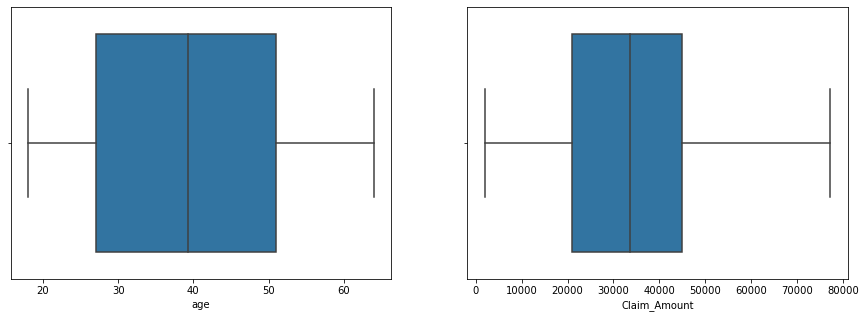

In [67]:
plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(insurance['age'])
plt.subplot(1,2,2)
sns.boxplot(insurance['Claim_Amount'])


# Data Preprocessing

In [28]:
insurance.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [85]:
insurance['age']=insurance['age'].fillna(insurance['age'].mean())
insurance['bmi']=insurance['bmi'].fillna(insurance['bmi'].mean())
insurance['children']=insurance['children'].fillna(insurance['children'].mode()[0])
insurance['Claim_Amount']=insurance['Claim_Amount'].fillna(insurance['Claim_Amount'].mean())
insurance['past_consultations']=insurance['past_consultations'].fillna(insurance['past_consultations'].mean())
insurance['num_of_steps']=insurance['num_of_steps'].fillna(insurance['num_of_steps'].mean())
insurance['Hospital_expenditure']=insurance['Hospital_expenditure'].fillna(insurance['Hospital_expenditure'].median())
insurance['NUmber_of_past_hospitalizations']=insurance['NUmber_of_past_hospitalizations'].fillna(insurance['NUmber_of_past_hospitalizations'].median())
insurance['Anual_Salary']=insurance['Anual_Salary'].fillna(insurance['Anual_Salary'].median())

# Feature Engineering

In [42]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [86]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
insurance['sex']=le.fit_transform(insurance['sex'])
insurance['children']=le.fit_transform(insurance['children'])
insurance['smoker']=le.fit_transform(insurance['smoker'])
insurance['region']=le.fit_transform(insurance['region'])

<AxesSubplot:>

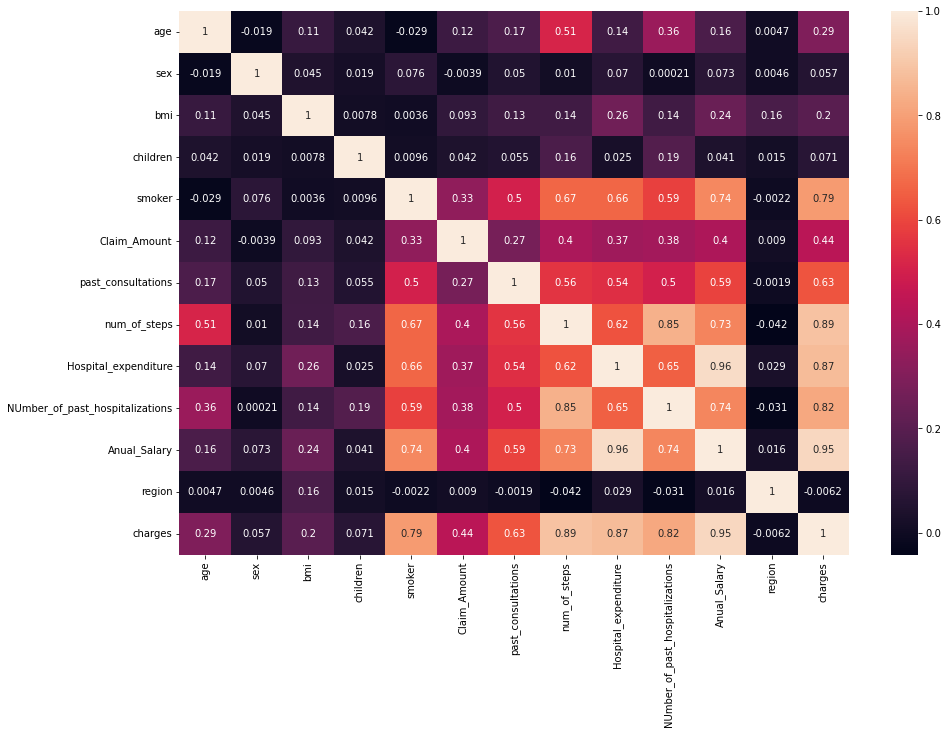

In [87]:
plt.figure(figsize=(15,10))
sns.heatmap(insurance.corr(),annot=True)

In [88]:
x=insurance.drop(['age','sex','bmi','children','region','charges'],axis=1)
y=insurance.iloc[:,-1]

# Model Training,Evaluation & Selection

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [91]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [92]:
from sklearn.linear_model import LinearRegression


In [93]:
model=LinearRegression()

In [94]:
model.fit(x_train,y_train)

LinearRegression()

In [95]:
train_pred=model.predict(x_train)

In [96]:
test_pred=model.predict(x_test)

In [97]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [98]:
print('train_MAE',mean_absolute_error(y_train,train_pred))
print('test_MAE',mean_absolute_error(y_test,test_pred))

train_MAE 992.045233019014
test_MAE 1031.0892581194448


In [99]:
print('train_MSE',mean_squared_error(y_train,train_pred))
print('test_MSE',mean_squared_error(y_test,test_pred))

train_MSE 2393443.493740416
test_MSE 4148126.352735465


In [100]:
print('train_r2',r2_score(y_train,train_pred))
print('test_r2',r2_score(y_test,test_pred))

train_r2 0.9837857077265915
test_r2 0.9708430811454096
